# Import Required Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import datetime as dt

# Download Stock Data

In [32]:
stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [33]:
df.head()  # Display first few rows

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,,
2007-10-05,32.764324,56.587513,61.593765,46.771885,50.512512,855215656
2007-10-08,31.087021,53.690639,58.500015,53.353138,58.500015,126671715
2007-10-09,33.204006,57.346889,57.853138,50.821888,53.718761,116725709
2007-10-10,33.513405,57.881264,59.062515,57.375015,58.837513,67931378
2007-10-11,37.258820,64.350014,67.500015,57.375015,67.500015,106320954


In [34]:
df.info()  # Display data info like columns and types

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (Adj Close, POWERGRID.NS)  4208 non-null   float64
 1   (Close, POWERGRID.NS)      4208 non-null   float64
 2   (High, POWERGRID.NS)       4208 non-null   float64
 3   (Low, POWERGRID.NS)        4208 non-null   float64
 4   (Open, POWERGRID.NS)       4208 non-null   float64
 5   (Volume, POWERGRID.NS)     4208 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 230.1 KB


In [35]:
df.isnull().sum()  # Check for missing values

Price      Ticker      
Adj Close  POWERGRID.NS    0
Close      POWERGRID.NS    0
High       POWERGRID.NS    0
Low        POWERGRID.NS    0
Open       POWERGRID.NS    0
Volume     POWERGRID.NS    0
dtype: int64

In [36]:
df.describe()  # Get statistical summary

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,80.182832,104.165058,105.540691,102.811225,104.222802,1.188963e+07
std,64.365734,60.546190,61.222254,59.830531,60.527683,2.061999e+07
min,19.129538,32.625008,34.875008,29.250008,34.706257,0.000000e+00
25%,36.774807,60.546108,61.284389,59.737514,60.609390,4.799653e+06
50%,55.878250,84.937523,86.779709,83.657833,85.289085,8.344398e+06
75%,83.671993,117.091434,118.307840,115.889091,117.112526,1.362032e+07
max,360.278564,365.450012,366.250000,357.200012,364.049988,8.552157e+08


In [37]:
df.shape

(4208, 6)

# Save and Load Data

In [38]:
df = df.reset_index()  # Reset index to make 'Date' a column
df.to_csv("powergrid.csv")  # Save to CSV file

In [39]:
data01 = pd.read_csv("powergrid.csv")  # Load data from CSV
data01.head()  # Display first few rows of loaded data

,Price,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.76432418823242,56.5875129699707,61.59376525878906,46.77188491821289,50.51251220703125,855215656
2,1,2007-10-08,31.087020874023438,53.69063949584961,58.50001525878906,53.3531379699707,58.50001525878906,126671715
3,2,2007-10-09,33.20400619506836,57.34688949584961,57.8531379699707,50.8218879699707,53.7187614440918,116725709
4,3,2007-10-10,33.513404846191406,57.881263732910156,59.06251525878906,57.37501525878906,58.8375129699707,67931378


# Candlestick Chart

In [40]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data01['Date'], open=data01['Open'], high=data01['High'], 
                                    low=data01['Low'], close=data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)  # Remove range slider
fig.show()  # Display the candlestick chart

# Plot Stock Prices Over Time

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_31860\3833344007.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



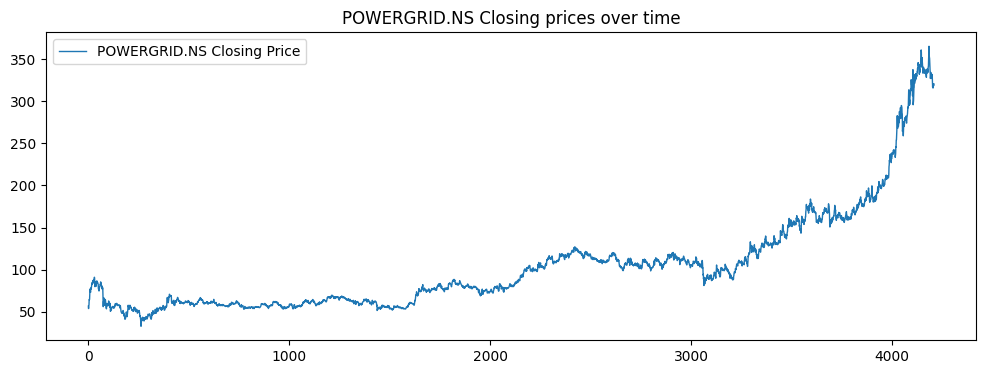

In [41]:
df = df.drop(['Date', 'Adj Close'], axis=1)  # Remove unnecessary columns
plt.figure(figsize=(12, 4))
plt.plot(df['Close'], label=f'{stock} Closing Price', linewidth=1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()


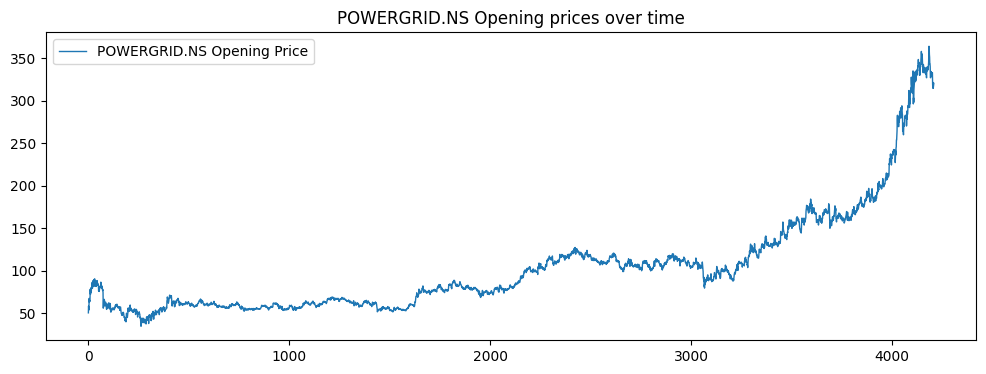

In [43]:

plt.figure(figsize=(12, 4))
plt.plot(df['Open'], label=f'{stock} Opening Price', linewidth=1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

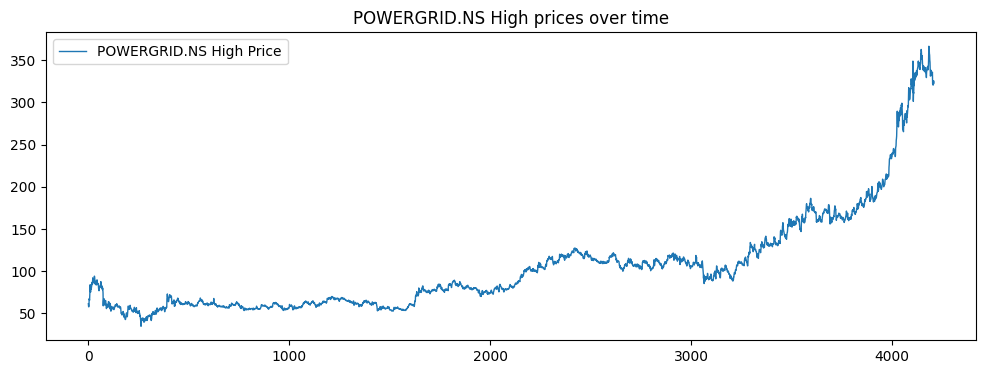

In [44]:
plt.figure(figsize=(12, 4))
plt.plot(df['High'], label=f'{stock} High Price', linewidth=1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

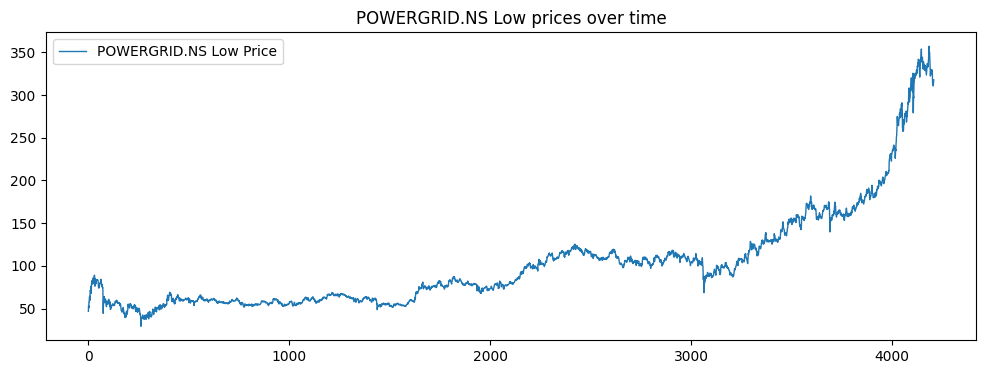

In [45]:
plt.figure(figsize=(12, 4))
plt.plot(df['Low'], label=f'{stock} Low Price', linewidth=1)
plt.title(f'{stock} Low prices over time')
plt.legend()
plt.show()

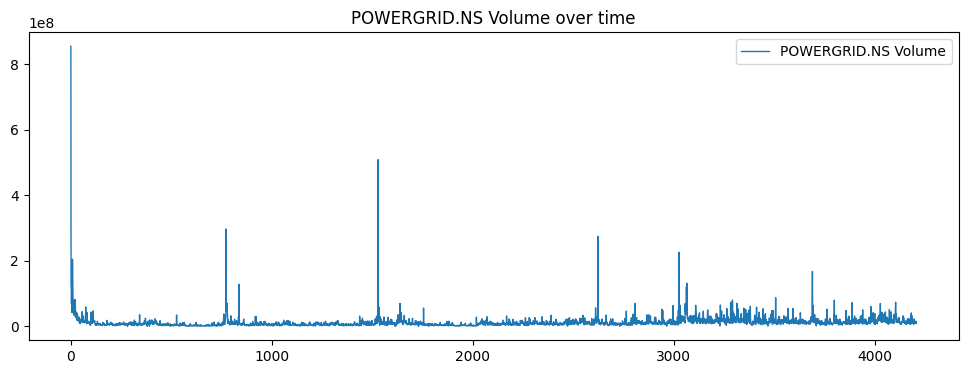

In [46]:
plt.figure(figsize=(12, 4))
plt.plot(df['Volume'], label=f'{stock} Volume', linewidth=1)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

# Moving Averages (Simple and Exponential)

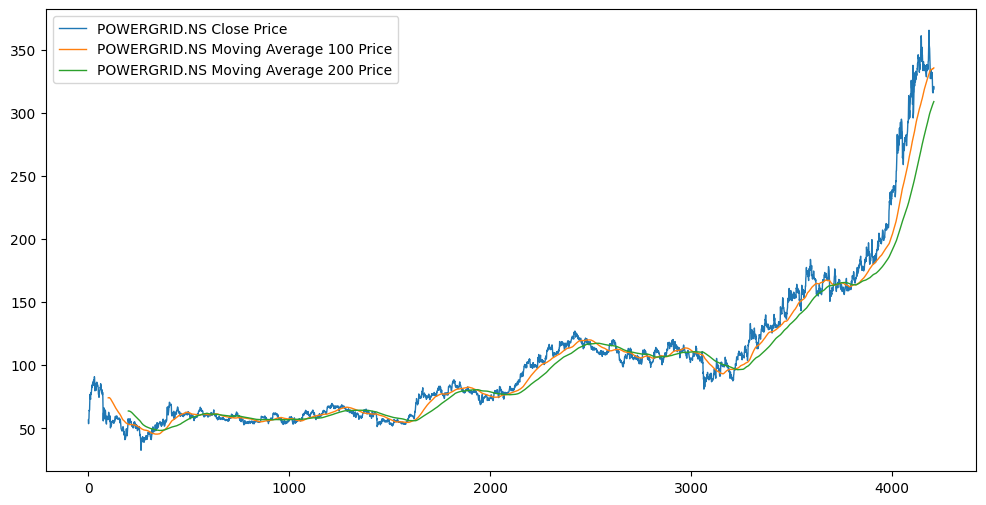

In [47]:
ma100 = df.Close.rolling(100).mean()  # 100-period moving average
ma200 = df.Close.rolling(200).mean()  # 200-period moving average
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label=f'{stock} Close Price', linewidth=1)
plt.plot(ma100, label=f'{stock} Moving Average 100 Price', linewidth=1)
plt.plot(ma200, label=f'{stock} Moving Average 200 Price', linewidth=1)
plt.legend()
plt.show()

# Exponential Moving Average

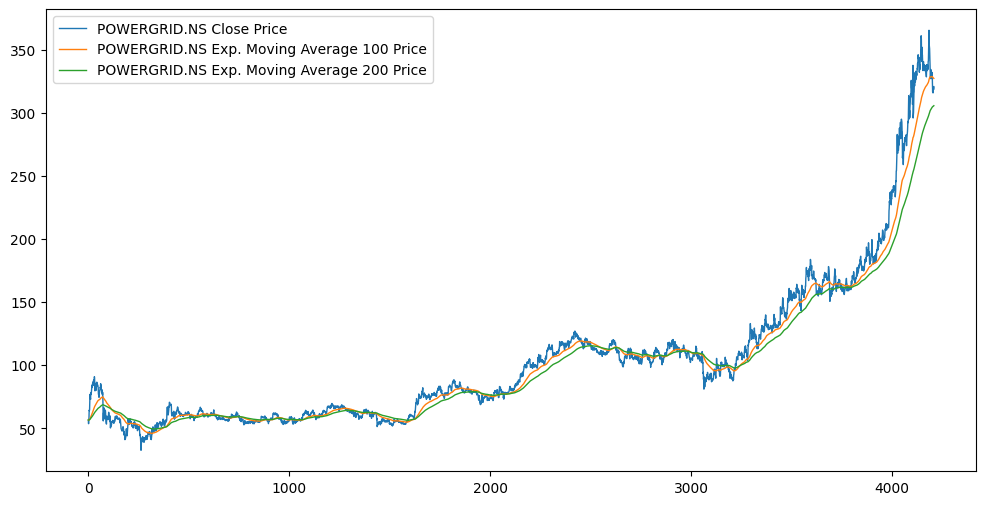

In [48]:
ema100 = df.Close.ewm(span=100, adjust=False).mean()  # Exponential Moving Average
ema200 = df['Close'].ewm(span=200, adjust=False).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label=f'{stock} Close Price', linewidth=1)
plt.plot(ema100, label=f'{stock} Exp. Moving Average 100 Price', linewidth=1)
plt.plot(ema200, label=f'{stock} Exp. Moving Average 200 Price', linewidth=1)
plt.legend()
plt.show()

# Prepare Data for Training

In [49]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])  # Training data (70%)
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):])  # Testing data (30%)


# Normalize Data (Min-Max Scaling)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))  # Scale data between 0 and 1
data_training_array = scaler.fit_transform(data_training)


# Prepare Training Data (X_train, Y_train)

In [51]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])  # Use past 100 days as features
    y_train.append(data_training_array[i, 0])  # The next day's price as the target
x_train, y_train = np.array(x_train), np.array(y_train)  # Convert lists to arrays

# Build the LSTM Model

In [52]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))  # Output layer with 1 unit
model.summary()  # Show model architecture
model.compile(optimizer='adam', loss='mean_squared_error')  # Compile model

C:\Users\RAHUL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [53]:
model.fit(x_train, y_train, epochs=50)  # Train the model for 50 epochs

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 215ms/step - loss: 0.0884
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 260ms/step - loss: 0.0093
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 248ms/step - loss: 0.0085
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 313ms/step - loss: 0.0066
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - loss: 0.0073
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 270ms/step - loss: 0.0069
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 287ms/step - loss: 0.0059
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 265ms/step - loss: 0.0051
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 258ms/step - loss: 0.0055
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 285ms/step - loss: 0.0052
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - loss: 0.0049
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 251ms/step - loss: 0.0047
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 277ms/step - loss: 0.0046
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - loss: 0.0039
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 

# Prepare Test Data

In [ ]:
past_100_days = data_training.tail(100)  # Last 100 days from training data
final_df = past_100_days.append(data_testing, ignore_index=True)  # Combine with test data
input_data = scaler.fit_transform(final_df)  # Normalize combined data

# Prepare Test Data (X_test, Y_test)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])  # Use past 100 days as features
    y_test.append(input_data[i, 0])  # The next day's price as the target

x_test, y_test = np.array(x_test), np.array(y_test)  # Convert lists to arrays


# Make Predictions and Plot Results

In [ ]:
y_predicted = model.predict(x_test)  # Predict stock prices

scaler_factor = 1 / 0.0035166  # Inverse scale factor to get original prices
y_predicted = y_predicted * scaler_factor  # Rescale predictions
y_test = y_test * scaler_factor  # Rescale actual prices

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Original Price', linewidth=1)
plt.plot(y_predicted, label='Predicted Price', linewidth=1)
plt.legend()
plt.show()


# Save the Model

In [ ]:
model.save('stock_dl_model.h5')  # Save the trained model for later use